**----------------HECTOR----------------** HNM

# **Part 2 Lab ******



# 1.1 Downloaded The dataset from the provided link and uploaded it to Google Colab.

Dataset Link used :  https://archive.ics.uci.edu/dataset/514/bias+correction+of+numerical+prediction+model+temperature+**forecast**


**assuming You went through LAB 1 and that part is done**
---


Starting Part 2  and Owards


Cell 1: Importing Required Libraries for PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Cell 2: Standardizing the Data for PCA



In [ ]:
# Selecting only numerical features for PCA
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

print("Data has been standardized.")


Data has been standardized.


Cell 3: Applying PCA and Choosing Number of Components


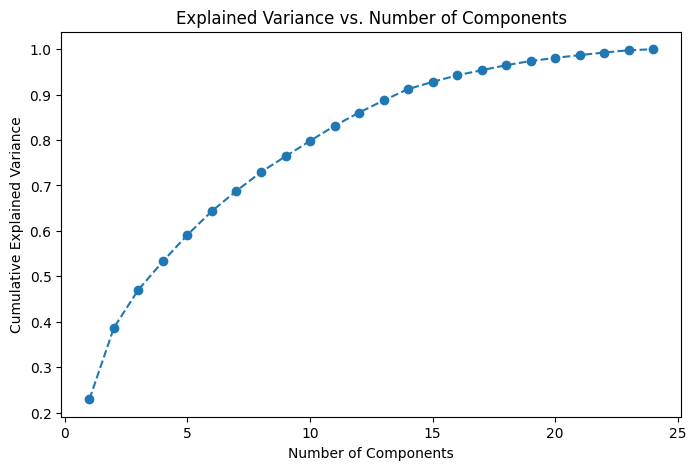

In [ ]:
# Applying PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()


Cell 4: Selecting Optimal Components & Transforming Data


In [ ]:
# Selecting number of components that explain at least 95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

print(f"Reduced the dataset to {n_components} principal components.")


Reduced the dataset to 17 principal components.


1.2 Feature Selection

Filter-based feature selection (Correlation-based).

Wrapper-based feature selection (Forward Selection).



Cell 5: Filter-Based Feature Selection (Correlation)

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Selecting highly correlated features (Threshold: 0.8)
correlated_features = set()
threshold = 0.8

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_features.add(corr_matrix.columns[i])

print("Highly correlated features to drop:", correlated_features)
df_filtered = df.drop(columns=correlated_features)


Highly correlated features to drop: {'month', 'Next_Tmin', 'Next_Tmax'}


In [ ]:
print(df.columns)


Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year', 'month', 'day'],
      dtype='object')


Cell 6: Wrapper-Based Feature Selection (Forward Selection)



In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Define the target variable
target_variable = 'Next_Tmax'

# Selecting only numerical features
df_filtered = df.drop(columns=['station'])  # Dropping non-numeric categorical feature

# Define model and feature selector
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')

# Fit on numeric features
sfs.fit(df_filtered.drop(columns=[target_variable]), df_filtered[target_variable])

selected_features = df_filtered.drop(columns=[target_variable]).columns[sfs.get_support()]
print("Selected features using forward selection:", selected_features)


Selected features using forward selection: Index(['Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_LH', 'LDAPS_CC4',
       'Next_Tmin'],
      dtype='object')


1.3 Handling Imbalanced Data

Check if the target variable is imbalanced.

Apply oversampling or undersampling techniques.



Cell 7: Checking Class Imbalance
and Handling Imbalance (Oversampling)



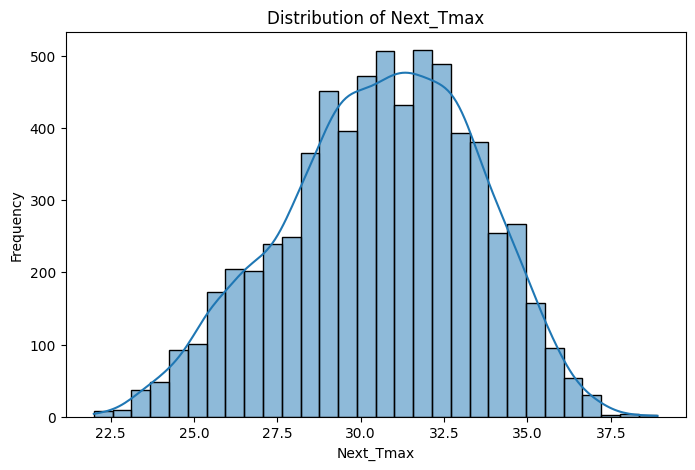

In [ ]:
import seaborn as sns

# Define the target variable (choose either 'Next_Tmax' or 'Next_Tmin')
target_variable = 'Next_Tmax'  # Update as needed

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df[target_variable], bins=30, kde=True)
plt.title(f"Distribution of {target_variable}")
plt.xlabel(target_variable)
plt.ylabel("Frequency")
plt.show()


Predictive Modeling

2.1 Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split

# Selecting features based on forward selection (from previous step)
X = df_filtered[selected_features]
y = df_filtered[target_variable]

# Splitting dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 5298, Testing samples: 1325


Train a Linear Regression model.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:\nMAE: {mae_lr:.4f}\nMSE: {mse_lr:.4f}\nR²: {r2_lr:.4f}")


Linear Regression Performance:
MAE: 1.1149
MSE: 2.1509
R²: 0.7439


Evaluate using MAE, MSE, R².

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Performance:\nMAE: {mae_dt:.4f}\nMSE: {mse_dt:.4f}\nR²: {r2_dt:.4f}")


Decision Tree Performance:
MAE: 1.1861
MSE: 2.4008
R²: 0.7142




2.2 Decision Tree

Cell 10: Train Decision Tree Model

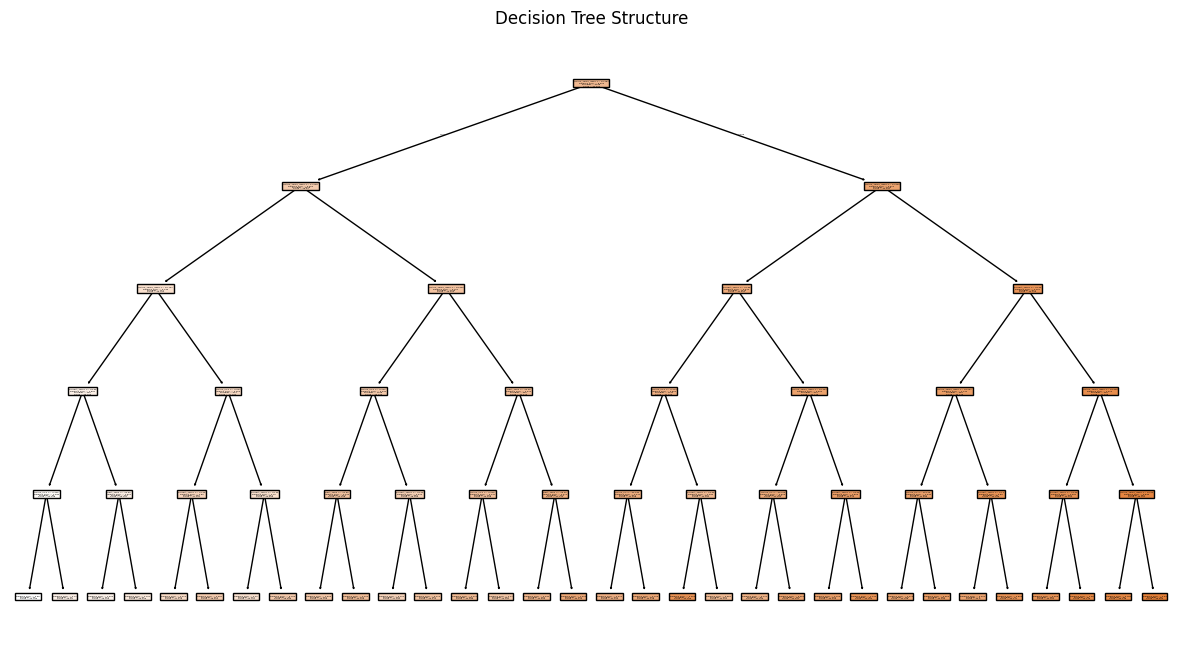

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=selected_features, filled=True)
plt.title("Decision Tree Structure")
plt.show()


 Model Evaluation

3.1 Comparing Model Performance

Cell 12: Comparison Table

In [ ]:
import pandas as pd

# Creating a comparison dataframe
models = ['Linear Regression', 'Decision Tree']
mae_scores = [mae_lr, mae_dt]
mse_scores = [mse_lr, mse_dt]
r2_scores = [r2_lr, r2_dt]

comparison_df = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores})
display(comparison_df)


,Model,MAE,MSE,R²
0,Linear Regression,1.114856,2.150920,0.743914
1,Decision Tree,1.186076,2.400824,0.714160


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['R²'].plot(kind='hist', bins=20, title='R²')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MSE', y='R²', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['R²']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('R²')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE']
  ys = series['R²']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('MAE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('R²')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MAE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MAE'}, axis=1)
              .sort_values('MAE', ascending=True))
  xs = counted['MAE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('MAE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['R²'].plot(kind='line', figsize=(8, 4), title='R²')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='R²', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

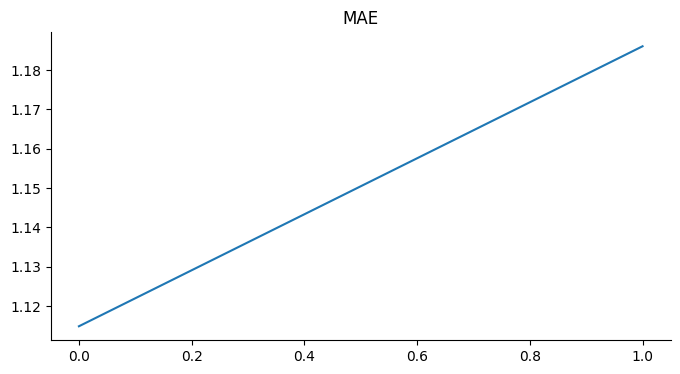

In [ ]:
from matplotlib import pyplot as plt
_df_13['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

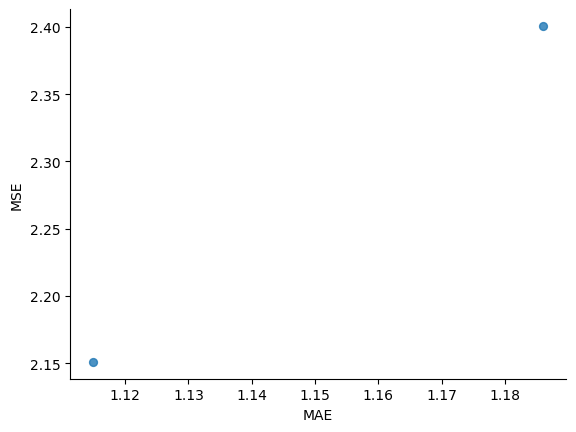

In [ ]:
# @title MAE vs MSE

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

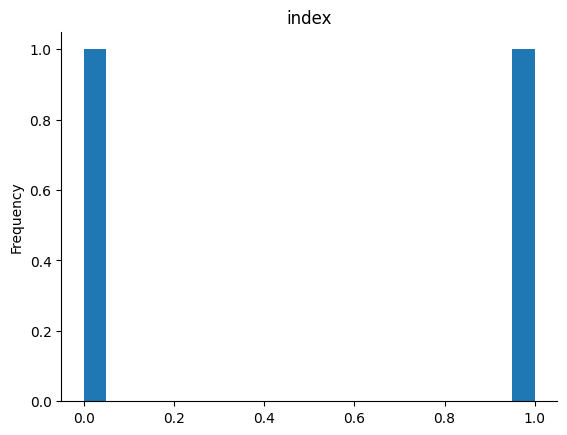

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

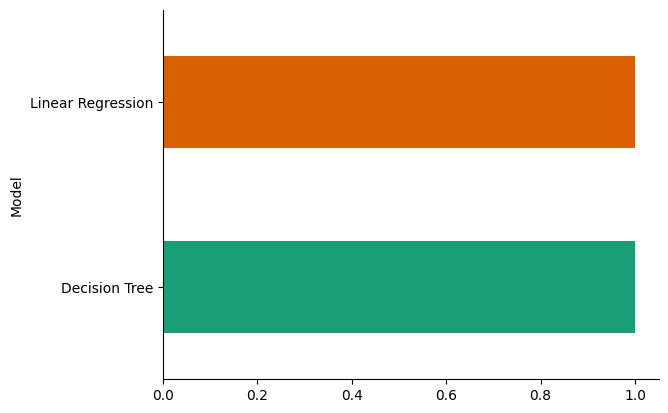

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

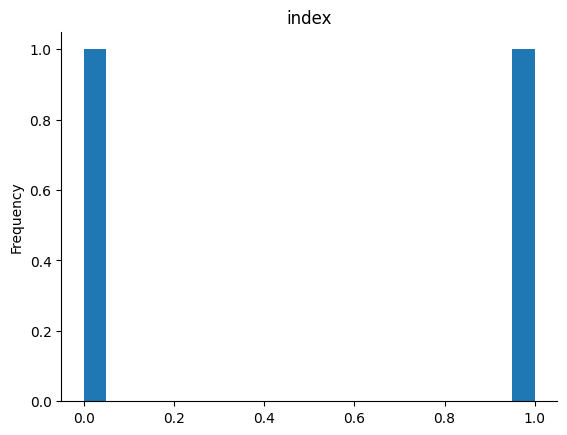

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

3.2 Cross-Validation

Cell 13: Performing k-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring='r2')
print(f"Linear Regression - Mean R²: {cv_scores_lr.mean():.4f}, Std: {cv_scores_lr.std():.4f}")

# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(dt, X, y, cv=5, scoring='r2')
print(f"Decision Tree - Mean R²: {cv_scores_dt.mean():.4f}, Std: {cv_scores_dt.std():.4f}")


Linear Regression - Mean R²: 0.7018, Std: 0.0354
Decision Tree - Mean R²: 0.6414, Std: 0.0380
